In [1]:
import numpy as np
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from math import sqrt
import torchvision.transforms as transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import copy
from collections import defaultdict
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [2]:
def extract_data(path,create_test=None):
    X_train=[]
    y_train=[]
    X_test=[]
    y_test=[]

    file=os.listdir(path)

    for entity in file:
        try:
            entityPath=os.listdir(f"{path}/{entity}")
            for i,data in enumerate(entityPath):
                try:
                    current_img=cv2.imread(f"{path}/{entity}/{data}")
                    if current_img is not None:
                        if (create_test is not None and ((len(entityPath)>1) and (i==0))):
                            X_test.append(current_img)
                            y_test.append(entity)
                        else:
                            X_train.append(current_img)
                            y_train.append(entity)
                    else:
                        print(f"{path}/{entity}/{data} is None type")
                except Exception as e:
                    print(f"Erreur avec {path}/{entity}/{data} : {e}")
        except Exception as ex:
            print(f"Erreur avec {path}/{entity} : {ex}")
    
    print(f"Number of training sample : {len(X_train)}\n")
    if create_test is not None:
        print(f"Number of test sample : {len(X_test)}\n")
        return X_train,y_train,X_test,y_test
    else:
        return X_train,y_train

In [3]:
def extract_face_and_eyes(img):
    if not isinstance(img,np.ndarray):
        img=cv2.imread(img)

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(60,60)
    )

    if len(faces)==0:
        return [],[]
    
    x,y,w,h=faces[0]
    face=img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(cv2.cvtColor(face,cv2.COLOR_BGR2GRAY))
    if len(eyes)==2:
        if eyes[0][0]<eyes[1][0]:
            x2=eyes[0][0]
            w2=eyes[1][0]+eyes[1][2]-x2
        else:
            x2=eyes[1][0]
            w2=eyes[0][0]+eyes[0][2]-x2
        if eyes[0][1]<eyes[1][1]:
            y2=eyes[0][1]
            h2=eyes[1][1]+eyes[1][3]-y2
        else:
            y2=eyes[1][1]
            h2=eyes[0][1]+eyes[0][3]-y2
        imgEyes=face[y2:y2+h2,x2:x2+w2]
        return face,imgEyes
    else:
        return face,[]
    

In [4]:
X,y=extract_data("DataFaces")
X_train=[]
y_train=[]
for i,img in enumerate(X):
    _,eyes=extract_face_and_eyes(img)
    if len(eyes)!=0:
        X_train.append(eyes)
        y_train.append(y[i])
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=1,stratify=y_train)
labels={label:i for i,label in enumerate(sorted(set(y_train)))} #list(set(y_train)) sort les val uniques en list et sorted les range dans l'ordre alphabétique

Number of training sample : 17534



In [6]:
print(len(X_train))
print(X_train[0].shape)

6340
(26, 71, 3)


In [11]:
h=0
l=0
for eyes in X_train:
    h+=eyes.shape[0]
    l+=eyes.shape[1]
avrH=h//len(X_train)
avrL=l//len(X_train)
print(f"Average height of eyes : {avrH}\nAverage length of eyes : {avrL}")

Average height of eyes : 45
Average length of eyes : 96


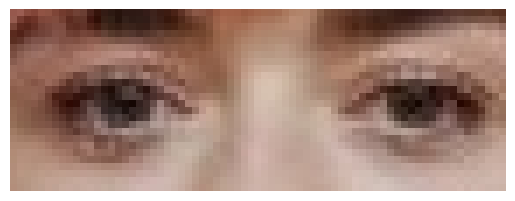

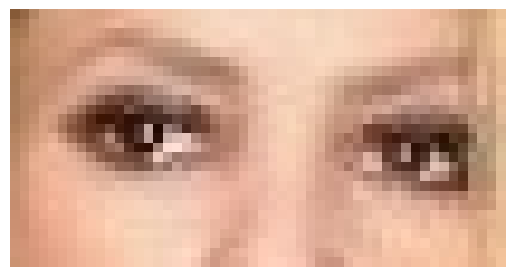

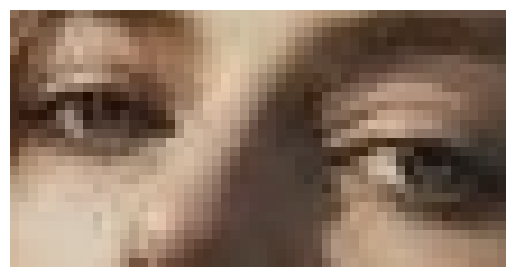

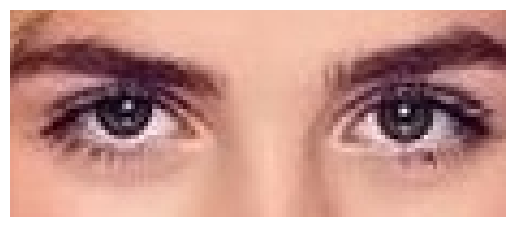

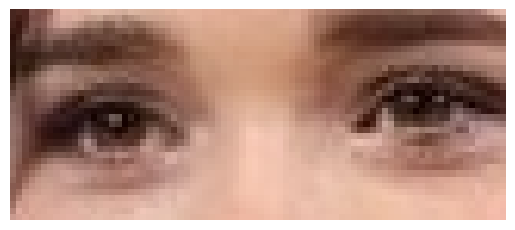

In [7]:
for u in range(5):
    img=cv2.cvtColor(X_train[u],cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()


Avant : (26, 71, 3)

après (45, 96, 3)



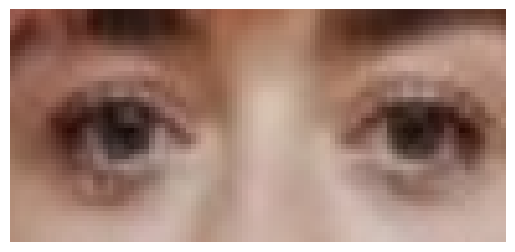


Avant : (27, 52, 3)

après (45, 96, 3)



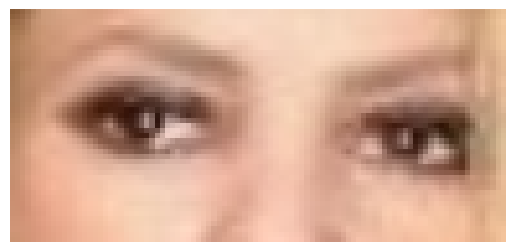


Avant : (28, 54, 3)

après (45, 96, 3)



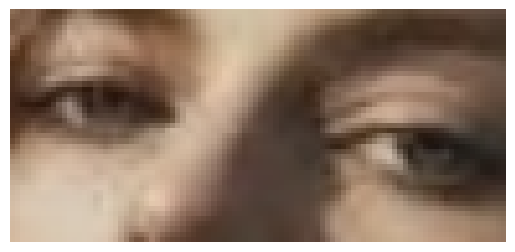


Avant : (48, 115, 3)

après (45, 96, 3)



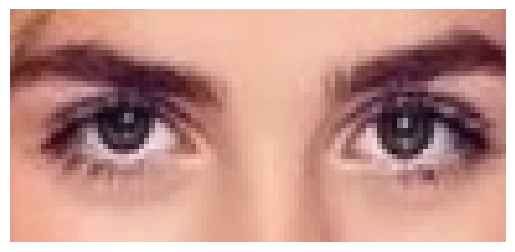


Avant : (34, 80, 3)

après (45, 96, 3)



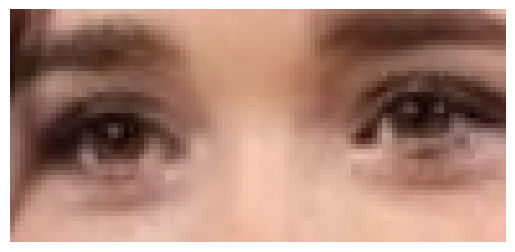

In [12]:
for u in range(5):
    img=cv2.cvtColor(X_train[u],cv2.COLOR_BGR2RGB)
    print(f"\nAvant : {img.shape}")
    img=cv2.resize(img,(avrL,avrH))
    print(f"\naprès {img.shape}\n")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [13]:
X_train=[cv2.resize(img,(avrL,avrH)) for img in X_train]
print(X_train[0].shape)

(45, 96, 3)


In [ ]:
transform_train=transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3,contrast=0.3,saturation=0.2,hue=0.02),
    transforms.ToTensor()
])

In [ ]:
def make_model(nb_classes):
    model=nn.Sequential(
        nn.Conv2d()
    )
    return model    